In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model, metrics

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#df = pd.read_csv(os.path.join('..', 'datasets', 'C:/Users/tcaballero/DS-SF-30/final-project/tiny cube binary.csv'))
df = pd.read_csv(os.path.join('..', 'datasets', 'C:/Users/tcaballero/DS-SF-30/final-project/tiny cube binary.csv'))
#df = pd.read_csv(os.path.join('..', 'datasets', 'C:/Users\tcaballero/Dropbox (Optimizely)/Finance/FP&A/Shared Folders/Tony/cube file/python/Customer Cube - 1.30.17.csv'))
df

C:\Users\tcaballero\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,customer_code,for_month,mrr,last_yr,last_mrr,...,billing_period,age,contract_start_date,retention,churn_dollars
0,A1,7/1/2016,1000,NaN,NaN,...,Quarter,38.0,3/9/2016,NaN,NaN
1,A1,8/1/2016,0,NaN,NaN,...,Quarter,38.0,3/9/2016,NaN,NaN
2,A1,9/1/2016,1000,NaN,NaN,...,Quarter,38.0,3/9/2016,NaN,NaN
3,A1,10/1/2016,1000,NaN,NaN,...,Quarter,38.0,3/9/2016,NaN,NaN
4,A1,11/1/2016,1000,NaN,NaN,...,Quarter,38.0,3/9/2016,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62517,A2312,8/1/2016,0,8/1/2015,0.0,...,NaN,NaN,NaN,NaN,NaN
62518,A2312,9/1/2016,0,9/1/2015,0.0,...,NaN,NaN,NaN,NaN,NaN
62519,A2312,10/1/2016,0,10/1/2015,0.0,...,NaN,NaN,NaN,NaN,NaN
62520,A2312,11/1/2016,0,11/1/2015,0.0,...,NaN,NaN,NaN,NaN,NaN


In [4]:
rows = df.shape[0]
cols = df.shape[1]
print "rows = {} and columns = {}".format(rows, cols)
print df.dtypes

rows = 62522 and columns = 39
customer_code           object
for_month               object
mrr                      int64
last_yr                 object
last_mrr               float64
                        ...   
billing_period          object
age                    float64
contract_start_date     object
retention              float64
churn_dollars          float64
dtype: object


In [5]:
df[[5,6,7,8,9,10]].isnull().sum()

mobile_experiments_started    0
experiments_started           0
allocation                    0
utilization                   0
tickets_created               0
impressions                   0
dtype: int64

KeyError: 'sig_exp_90'

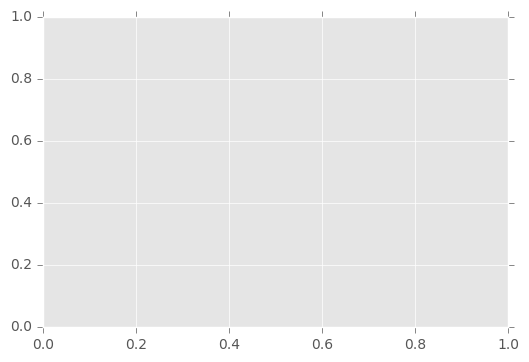

In [7]:
df.plot(kind = 'scatter', x = 'logins', y = 'churn_dollars')


In [7]:
model = smf.ols(formula = 'churn_dollars ~ logins + running_experiment_days + utilization', data = df).fit()

model.summary()
#only utilization and intercept seem to be significant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          churn_dollars   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.116
Date:                Thu, 02 Feb 2017   Prob (F-statistic):             0.0253
Time:                        20:10:52   Log-Likelihood:                -11577.
No. Observations:                1383   AIC:                         2.316e+04
Df Residuals:                    1379   BIC:                         2.318e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                -226.3141     31.398     -7.208      0.000      -287.908  -164.720
logins                      0.0446      0.060      0.740      0.459        -0.074     0.163
running_experiment_days     0.1383      0.092      1.498      0.134        -0.043     0.319
utilization                -0.0002   7.44e-05     -2.913      0.004        -0.000 -7.08e-05
==============================================================================
Omnibus:                     2121.316   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           734344.000
Skew:                          -9.342   Prob(JB):                         0.00
Kurtosis:                     114.330   Cond. No.                     4.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

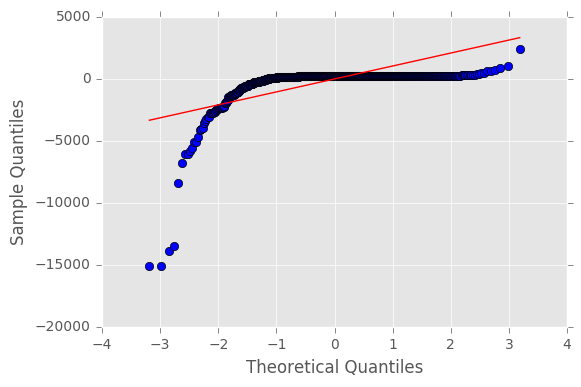

In [8]:
sm.qqplot(model.resid, line = 's')

pass
#VERY NOT NORMALLY DISTRIBUTED. Probably shouldn't continue with regression. 

In [9]:
df.corr()

,mrr,last_mrr,sig_exp_90,partner_flag,logins,running_experiment_days,utilization,churn_dollars,churned
mrr,1.000000,0.582746,0.096620,0.063532,0.151409,0.042509,0.030040,-0.005181,0.053624
last_mrr,0.582746,1.000000,0.171272,0.010136,0.223306,0.087817,0.079614,-0.401963,0.095252
sig_exp_90,0.096620,0.171272,1.000000,0.150382,0.303610,0.019164,-0.023155,0.041314,0.377298
partner_flag,0.063532,0.010136,0.150382,1.000000,0.114541,0.014452,-0.023101,-0.006236,0.144707
logins,0.151409,0.223306,0.303610,0.114541,1.000000,-0.021655,-0.019044,0.021282,0.234215
running_experiment_days,0.042509,0.087817,0.019164,0.014452,-0.021655,1.000000,0.373400,0.012283,-0.178273
utilization,0.030040,0.079614,-0.023155,-0.023101,-0.019044,0.373400,1.000000,-0.068949,-0.140390
churn_dollars,-0.005181,-0.401963,0.041314,-0.006236,0.021282,0.012283,-0.068949,1.000000,0.066353
churned,0.053624,0.095252,0.377298,0.144707,0.234215,-0.178273,-0.140390,0.066353,1.000000


In [10]:
#shift gocus to try logistic regression and use churn binary flag as 

In [13]:
train_df = df.sample(frac = .75, random_state = 0)
test_df = df.drop(train_df.index)

In [23]:
train_df.columns

Index([u'customer_id', u'for_month', u'mrr', u'last_yr', u'last_mrr',
       u'sig_exp_90', u'partner_flag', u'logins', u'running_experiment_days',
       u'utilization', u'churn_dollars', u'churned'],
      dtype='object')

In [11]:
names_X = ['sig_exp_90', 'partner_flag', 'logins',
    'running_experiment_days', 'utilization']       #, 'churn_dollars']

def X_c(df):
    X = df[ names_X ]
    c = df.churned
    return X, c

train_X, train_c = X_c(train_df)
test_X, test_c = X_c(test_df)

SyntaxError: invalid syntax (<ipython-input-11-9dc7f2259f50>, line 1)

In [ ]:
model = linear_model.LogisticRegression().fit(train_X, train_c)

print model.intercept_
print model.coef_

In [34]:
model = linear_model.LogisticRegression().\
    fit(test_X, test_c)

print model.intercept_
print model.coef_

[ 0.00068708]
[[  5.95686049e-04   1.72235218e-04   3.14446083e-02  -1.35420224e-02
   -3.09179648e-07]]


In [35]:
print 'training misclassification =', 1 - model.score(train_X, train_c)
print 'testing  misclassification =', 1 - model.score(test_X, test_c)

training misclassification = 0.166185804962
testing  misclassification = 0.160899653979
